In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [52]:
# reading dataset

df = pd.read_csv("students.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Here, we can see that there are two columns hours and scores of students of which Scores is a dependent varibale y and hours is an independent variable x.

Since there is only one independent feature, this must be the case of simple linear regression where we need to predict the test score of a student based on their marks.

So, we need to find such value of "m"(slope) and "b"(intercept) so that the errors between our predicted and real value becomes less and we approach towards getting the best fit line.

In [53]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


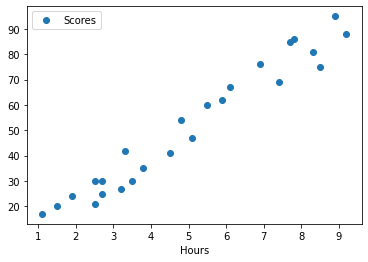

In [54]:
# we will first see the scatter plot about the dependency of the varibales

df.plot(x = "Hours", y = "Scores", style='o')
plt.show()

So, from the scatter plot we can see that our data points are sort of linear so we can apply the linear regression on it. 

In [55]:
# lets see the correlation matrix

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As we can see the correlation between hours and score is 0.97 which is very close to 1 so the varibles are highly positively correlated with one another.

In [56]:
# Lets split our data into dependent and independent features

x = df.iloc[:,:-1].values
y = df.iloc[:,1].values


In [58]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [59]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [68]:
# lets split the data into train data and test data


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [69]:
print(X_train.shape)
print(y_train.shape)

(20, 1)
(20,)


In [62]:
print(X_test.shape)
print(y_test.shape)

(5, 1)
(5,)


In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

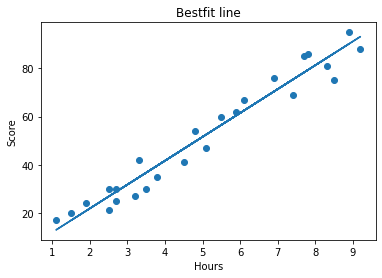

In [64]:
# lets see the regression(best-fit) line

line = lr.coef_*x + lr.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Bestfit line")
plt.show()



In [65]:
pred = lr.predict(X_test)

In [71]:
df1 =pd.DataFrame({"Actual Values": y_test, "Predicted_Value": pred})
df1.head()

,Actual Values,Predicted_Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [74]:
# my own prediction
lr.predict([[9.25]])

array([93.69173249])

In [75]:
score = r2_score(y_test, pred)

In [76]:
score

0.9454906892105354

We are getting a score of 0.94 ie 94% of the total variation present in our data is captured by our model. It did a good job!